In [1]:
# 1. Significant earthquakes since 2150 B.C.
#1.1
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline
# filter warnings
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime

In [2]:
Sig_Eqs = pd.read_csv('earthquakes-2023-11-01_21-35-45_+0800.tsv',sep='\t')

In [3]:
# Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country
total_deaths = Sig_Eqs.groupby('Country')['Deaths'].sum()
total_deaths

Country
AFGHANISTAN                             15644.0
ALBANIA                                  3132.0
ALGERIA                                 39339.0
ANTARCTICA                                  0.0
ANTIGUA AND BARBUDA                         0.0
                                         ...   
VENEZUELA                               44480.0
VIETNAM                                     0.0
WALLIS AND FUTUNA (FRENCH TERRITORY)        5.0
YEMEN                                    4192.0
ZAMBIA                                      0.0
Name: Deaths, Length: 156, dtype: float64

In [4]:
# print the top ten countries along with the total number of deaths
total_deaths.sort_values(ascending=False).head(10)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64

In [5]:
# 1.2
# Compute the total number of earthquakes with magnitude larger than 6.0 worldwide each year
large_quakes = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]
earthquakes_per_year = large_quakes.groupby(Sig_Eqs['Year'])['Mag'].count()
earthquakes_per_year

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2019.0    27
 2020.0    15
 2021.0    23
 2022.0    20
 2023.0    22
Name: Mag, Length: 536, dtype: int64

<Axes: xlabel='Year'>

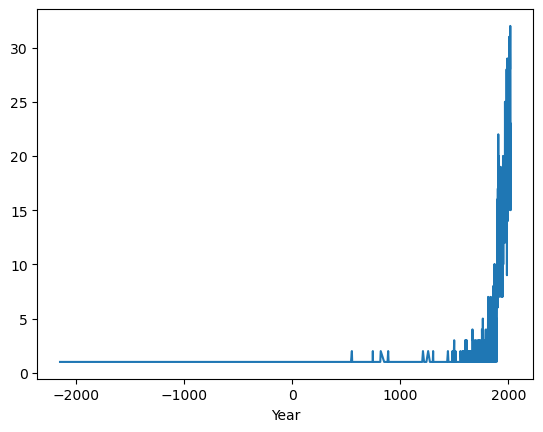

In [6]:
# plot the time series
earthquakes_per_year.plot()
# From the graph, we can see that the frequency of earthquakes has been increasing since about 1500 AD, and the trend has been getting higher and higher.

In [7]:
# 1.3
# function CountEq_LargestEq

def CountEq_LargestEq(country):
    country_eqs = Sig_Eqs[Sig_Eqs['Country'] == country]
    eq_count = len(country_eqs)
    
    if eq_count > 0:
        largest_eq = country_eqs.sort_values('Mag', ascending=False).iloc[0]
        largest_eq_date = f"{largest_eq['Year']}-{largest_eq['Mo']}-{largest_eq['Dy']}"
    else:
        largest_eq_date = "No earthquakes"
    
    return eq_count, largest_eq_date

results = []
for country in Sig_Eqs['Country'].unique():
    eq_count, largest_eq_date = CountEq_LargestEq(country)
    results.append((country, eq_count, largest_eq_date))

results.sort(key=lambda x: x[1], reverse=True)

for country, eq_count, largest_eq_date in results:
    print(f"Country: {country}\nTotal Earthquakes: {eq_count}\nLargest Earthquake Date: {largest_eq_date}\n")


Country: CHINA
Total Earthquakes: 620
Largest Earthquake Date: 1668.0-7.0-25.0

Country: JAPAN
Total Earthquakes: 414
Largest Earthquake Date: 2011.0-3.0-11.0

Country: INDONESIA
Total Earthquakes: 411
Largest Earthquake Date: 2004.0-12.0-26.0

Country: IRAN
Total Earthquakes: 384
Largest Earthquake Date: 856.0-12.0-22.0

Country: TURKEY
Total Earthquakes: 335
Largest Earthquake Date: 2023.0-2.0-6.0

Country: ITALY
Total Earthquakes: 331
Largest Earthquake Date: 1915.0-1.0-13.0

Country: USA
Total Earthquakes: 276
Largest Earthquake Date: 1964.0-3.0-28.0

Country: GREECE
Total Earthquakes: 270
Largest Earthquake Date: 1303.0-8.0-8.0

Country: PHILIPPINES
Total Earthquakes: 224
Largest Earthquake Date: 1897.0-9.0-21.0

Country: MEXICO
Total Earthquakes: 209
Largest Earthquake Date: 1899.0-1.0-24.0

Country: CHILE
Total Earthquakes: 198
Largest Earthquake Date: 1960.0-5.0-22.0

Country: PERU
Total Earthquakes: 190
Largest Earthquake Date: 1716.0-2.0-6.0

Country: RUSSIA
Total Earthquakes

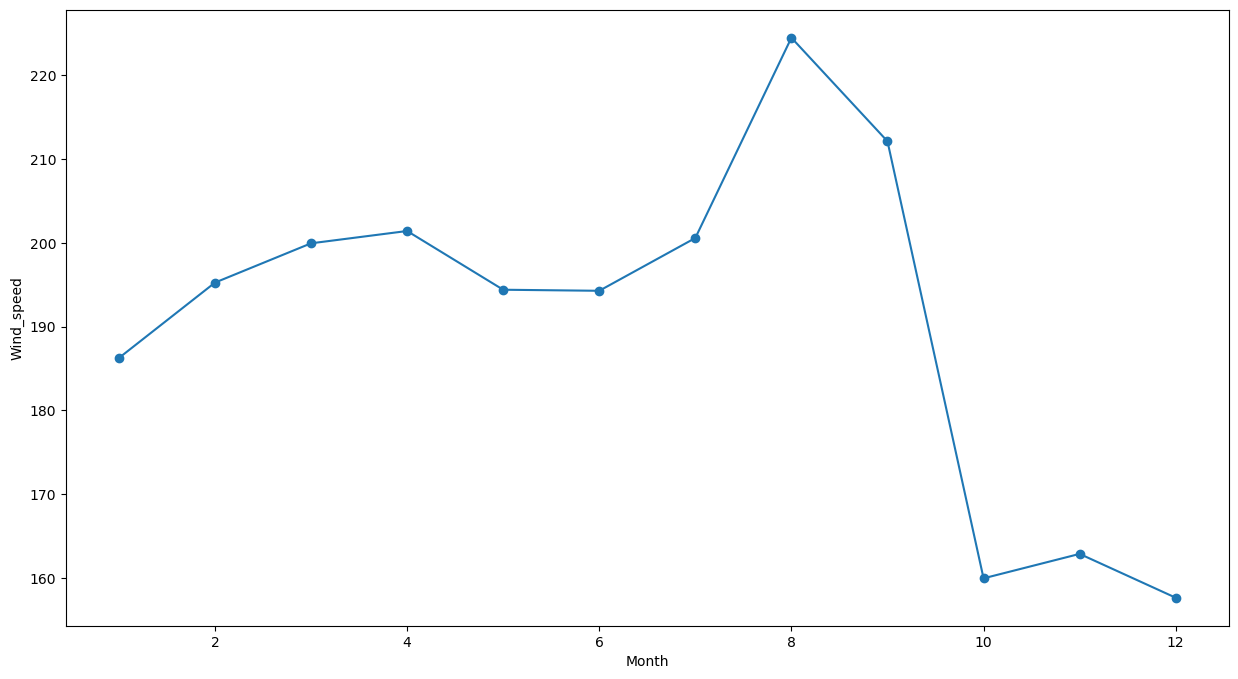

In [9]:
# 2. Wind speed in Shenzhen during the past 10 years
# I asked my Senior fellow apprentice Wangchao Zhao for help.
data = pd.read_csv("2281305.csv")
data['q'], data['w'], data['e'], data['r'], data['t'] = data['WND'].str.split(',').str
data = data[data['q'] != 9999]
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%dT%H:%M:%S')  # Convert date column to datetime format
data['q'] = data['q'].astype(float)
months = data.groupby(data['DATE'].dt.month)['q'].mean()
plt.figure(figsize=(15,8))
m = range(1,13)
plt.plot(m, months, marker='o')
plt.xlabel('Month')
plt.ylabel('Wind_speed')
plt.show()

<Axes: xlabel='YEAR,MONTH'>

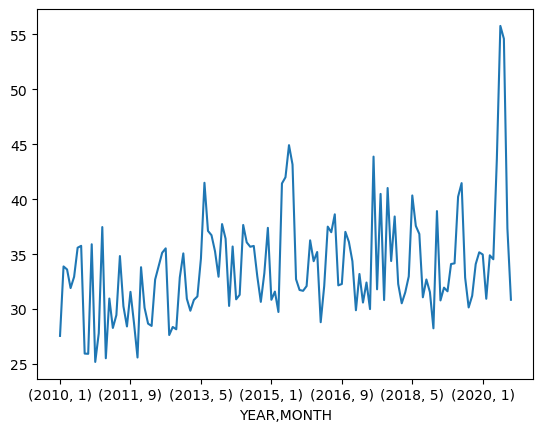

In [10]:
# This is another method to show the mean wind speed.
data['WS'] = data['WND'].str.split(',', expand=True)[3]
data['YEAR'] = pd.to_datetime(data['DATE']).dt.year
data['MONTH'] = pd.to_datetime(data['DATE']).dt.month
data1 = data[data['WS'] != '9999'].copy()  

data1['WS'] = data1['WS'].astype(float)
data1.groupby(["YEAR", "MONTH"])['WS'].mean().plot()

In [11]:
# 3 Explore a data set
# 3.1
namors = pd.read_csv("NAMORS_EC_2005-2019.csv",
                usecols=range(38))
namors.head()

,filename,date,time,D/T,DOY,daytime,file_records,used_records,Tau,qc_Tau,...,h2o_v.adv,co2_molar_density,co2_mole_fraction,co2_mixing_ratio,co2_time_lag,co2_def_timelag,h2o_molar_density,h2o_mole_fraction,h2o_mixing_ratio,h2o_time_lag
0,2005_12_04_2230_ECNM.DAT,2005/12/4,23:00,2005/12/4 23:00,338.958,0,18000,18000,-0.289860,0,...,0.0,9.54442,373.935,374.87,-0.1,0,55.4124,2.17097,2.17569,0.8
1,2005_12_04_2300_ECNM.DAT,2005/12/4,23:30,2005/12/4 23:30,338.979,0,18000,18000,-0.208521,0,...,0.0,9.56390,373.936,374.81,0.0,1,50.7716,1.98511,1.98906,0.0
2,2005_12_04_2330_ECNM.DAT,2005/12/5,0:00,2005/12/5 0:00,339.000,0,18000,18000,-0.136485,1,...,-0.0,9.57147,373.894,374.80,0.0,1,52.0854,2.03463,2.03878,0.0
3,2005_12_05_0000_ECNM.DAT,2005/12/5,0:30,2005/12/5 0:30,339.021,0,18000,18000,-0.351929,0,...,0.0,9.53219,371.728,372.57,0.0,1,48.8462,1.90486,1.90849,0.0
4,2005_12_05_0030_ECNM.DAT,2005/12/5,1:00,2005/12/5 1:00,339.042,0,18000,18000,-0.132003,1,...,0.0,9.54035,371.628,372.50,0.0,1,50.4403,1.96481,1.96868,0.0


In [12]:
# clean possible data points with missing values or bad quality
avail_namors = namors[namors['co2_mixing_ratio'] != -9999]
avail_namors

,filename,date,time,D/T,DOY,daytime,file_records,used_records,Tau,qc_Tau,...,h2o_v.adv,co2_molar_density,co2_mole_fraction,co2_mixing_ratio,co2_time_lag,co2_def_timelag,h2o_molar_density,h2o_mole_fraction,h2o_mixing_ratio,h2o_time_lag
0,2005_12_04_2230_ECNM.DAT,2005/12/4,23:00,2005/12/4 23:00,338.958,0,18000,18000,-0.289860,0,...,0.0,9.54442,373.935,374.87,-0.1,0,55.4124,2.17097,2.17569,0.8
1,2005_12_04_2300_ECNM.DAT,2005/12/4,23:30,2005/12/4 23:30,338.979,0,18000,18000,-0.208521,0,...,0.0,9.56390,373.936,374.81,0.0,1,50.7716,1.98511,1.98906,0.0
2,2005_12_04_2330_ECNM.DAT,2005/12/5,0:00,2005/12/5 0:00,339.000,0,18000,18000,-0.136485,1,...,-0.0,9.57147,373.894,374.80,0.0,1,52.0854,2.03463,2.03878,0.0
3,2005_12_05_0000_ECNM.DAT,2005/12/5,0:30,2005/12/5 0:30,339.021,0,18000,18000,-0.351929,0,...,0.0,9.53219,371.728,372.57,0.0,1,48.8462,1.90486,1.90849,0.0
4,2005_12_05_0030_ECNM.DAT,2005/12/5,1:00,2005/12/5 1:00,339.042,0,18000,18000,-0.132003,1,...,0.0,9.54035,371.628,372.50,0.0,1,50.4403,1.96481,1.96868,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241173,2019_09_07_0900_ECNM.DAT,2019/9/7,9:30,2019/9/7 9:30,250.396,1,18000,18000,-0.022232,1,...,-2.21924,9.96015,403.539,418.58,-0.1,0,323.4920,13.1064,13.28040,-0.1
241174,2019_09_07_0930_ECNM.DAT,2019/9/7,10:00,2019/9/7 10:00,250.417,1,18000,18000,-0.016044,0,...,-3.50455,8.38479,340.367,349.10,0.0,1,323.9490,13.1502,13.32540,0.0
241175,2019_09_07_1000_ECNM.DAT,2019/9/7,10:30,2019/9/7 10:30,250.437,1,18000,18000,-0.016734,0,...,-9.70468,8.40663,343.063,347.62,0.0,1,328.7360,13.4153,13.59770,0.0
241176,2019_09_07_1030_ECNM.DAT,2019/9/7,11:00,2019/9/7 11:00,250.458,1,18000,18000,0.008799,2,...,-7.60706,8.40991,344.235,349.01,0.1,0,342.4720,14.0181,14.21740,0.1


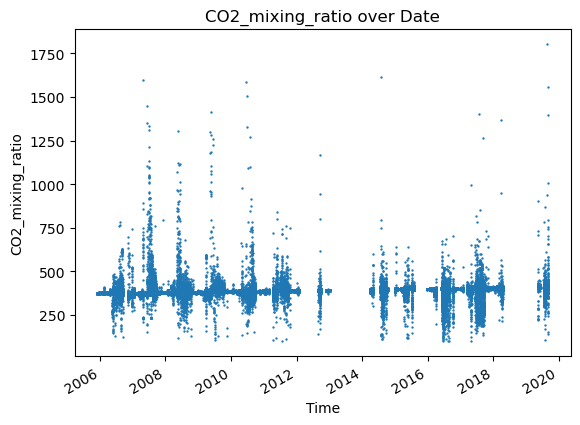

In [17]:
# 3.2 Plot the time series of a certain variable.
# I asked my Senior fellow apprentice Wangchao Zhao for help.
avail_namors['time'] = pd.to_datetime(avail_namors['D/T'], format='%Y/%m/%d %H:%M:%S')
avail_namors = avail_namors[avail_namors['co2_mixing_ratio'] > 100]
avail_namors = avail_namors[avail_namors['co2_mixing_ratio']<2000]

plt.figure()
plt.scatter(avail_namors['time'], avail_namors['co2_mixing_ratio'], s=0.5)
plt.title('CO2_mixing_ratio over Date')
plt.xlabel('Time')
plt.ylabel('CO2_mixing_ratio')
plt.gcf().autofmt_xdate()
plt.show()

In [18]:
# 3.3 Conduct at least 5 simple statistical checks with the variable, and report your findings.

mean_avail_namors = avail_namors['co2_mixing_ratio'].mean()
median_avail_namors = avail_namors['co2_mixing_ratio'].median()
std_avail_namors = avail_namors['co2_mixing_ratio'].std()
min_avail_namors = avail_namors['co2_mixing_ratio'].min()
max_avail_namors = avail_namors['co2_mixing_ratio'].max()

print(f"Mean co2_mixing_ratio: {mean_avail_namors}")
print(f"Median co2_mixing_ratio: {median_avail_namors}")
print(f"Standard Deviation of co2_mixing_ratio: {std_avail_namors}")
print(f"Minimum co2_mixing_ratio: {min_avail_namors}")
print(f"Maximum co2_mixing_ratio: {max_avail_namors}")

Mean co2_mixing_ratio: 389.5477290182768
Median co2_mixing_ratio: 386.6
Standard Deviation of co2_mixing_ratio: 32.41726133226181
Minimum co2_mixing_ratio: 101.18
Maximum co2_mixing_ratio: 1801.71


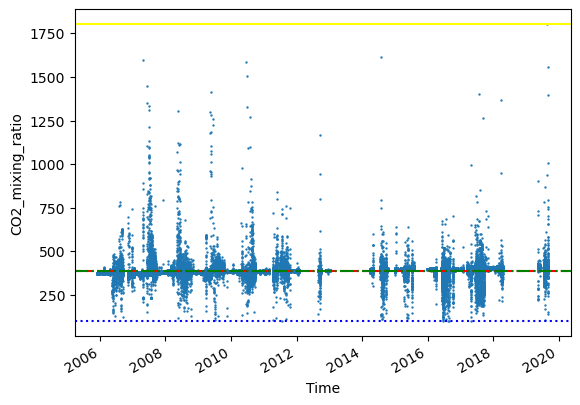

In [19]:
plt.axhline(mean_avail_namors, color='red', linestyle='--', label=f'Mean: {mean_avail_namors:.2f}')
plt.axhline(median_avail_namors, color='green', linestyle='-.', label=f'Mean: {median_avail_namors:.2f}')
plt.axhline(min_avail_namors, color='blue', linestyle=':', label=f'Mean: {min_avail_namors:.2f}')
plt.axhline(max_avail_namors, color='yellow', linestyle='-', label=f'Mean: {max_avail_namors:.2f}')

plt.scatter(avail_namors['time'], avail_namors['co2_mixing_ratio'], s=0.5)
plt.xlabel('Time')
plt.ylabel('CO2_mixing_ratio')
plt.gcf().autofmt_xdate()
plt.show()